In [1]:
from __future__ import print_function, division

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Input, BatchNormalization, Activation, ZeroPadding2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.utils import plot_model
from numpy import random

import matplotlib.pyplot as plt
import numpy as np
import sys
import os as os

In [2]:
noise_shape = 100
nh = 64
nw = 64
nc = 3
img_shape = (nh, nw, nc)

# Carefully chosen parameters 
d_opt = Adam(lr = 0.0002, beta_1 = 0.5)
g_opt = Adam(lr = 0.0002, beta_1 = 0.5)

In [3]:
def build_generator():
  
  model = Sequential()
  model.add(Dense(128 * 4 * 4, input_dim = noise_shape, name = 'Dense_Layer'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_Dense'))
  model.add(Reshape((4, 4, 128) , name = "Reshape_Layer"))
  
  #
  model.add(Conv2D(128, kernel_size=3,  padding="same", name = "Conv_Layer"))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU'))
  model.add(BatchNormalization(momentum=0.8, name = "Batch_Norm"))
  #
  
  model.add(UpSampling2D(name = 'UpSampling_Layer_2'))
  model.add(Conv2D(64, kernel_size=3,  padding="same", name = "Conv_Layer_2"))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_2'))
  model.add(BatchNormalization(momentum=0.8, name = "Batch_Norm_2"))
  
  model.add(UpSampling2D(name = 'UpSampling_Layer_3'))
  model.add(Conv2D(32, kernel_size=3, padding="same", name = 'Conv_Layer_3'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_3'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_3'))
  
  model.add(UpSampling2D(name = 'UpSampling_Layer_4'))
  model.add(Conv2D(16, kernel_size=3, padding="same", name = 'Conv_Layer_4'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_4'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_4'))
  
  model.add(UpSampling2D(name = 'UpSampling_Layer_5'))
  model.add(Conv2D(8, kernel_size=3, padding="same", name = 'Conv_Layer_5'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_5'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_5'))
  
  model.add(Conv2D(4, kernel_size=3, padding="same", name = 'Conv_Layer_6'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_6'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_6'))
  
  model.add(Conv2D(3, kernel_size=3, padding="same", name = 'Conv_Layer_7'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_7'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_7'))
  model.add(Activation("tanh"))
   
  print(model.summary())
  
  #Picturizing model
  plot_model(model, to_file='generator.png')
  
  noise = Input(shape = (noise_shape,))
  img = model(noise)
  
  return Model(inputs = noise, outputs = img, name = "Generator")
  

In [4]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_Layer (Dense)          (None, 2048)              206848    
_________________________________________________________________
Leaky_ReLU_Dense (LeakyReLU) (None, 2048)              0         
_________________________________________________________________
Reshape_Layer (Reshape)      (None, 4, 4, 128)         0         
_________________________________________________________________
Conv_Layer (Conv2D)          (None, 4, 4, 128)         147584    
_________________________________________________________________
Leaky_ReLU (LeakyReLU)       (None, 4, 4, 128)         0         
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 4, 4, 128)         512       
_________________________________________________________________
UpSampling_Layer_2 (UpSampli (None, 8, 8, 128)         0

In [5]:
def build_discriminator():
  model = Sequential()
  
  model.add(Conv2D(4, kernel_size=3, input_shape = img_shape, padding="same", name = 'Conv_Layer'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm'))
  
  model.add(Conv2D(8, kernel_size=3, strides = 2, name = 'Conv_Layer_2'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_2'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_2'))
  
  model.add(Conv2D(16, kernel_size=3, strides = 2, name = 'Conv_Layer_3'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_3'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_3'))
  
  model.add(Conv2D(32, kernel_size=3, strides = 2, name = 'Conv_Layer_4'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_4'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_4'))
  
  model.add(Conv2D(64, kernel_size=2, strides = 1, name = 'Conv_Layer_5'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_5'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_5'))
  
  #
  model.add(Conv2D(128, kernel_size=2, strides = 1, name = 'Conv_Layer_6'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_6'))
  model.add(BatchNormalization(momentum=0.8, name = 'Batch_Norm_6'))
  #
  
  model.add(Flatten(name = 'Flatten'))
  model.add(Dense(512, name = 'Dense_Layer'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_7'))
  
  model.add(Dense(256, name = 'Dense_Layer_2'))
  model.add(LeakyReLU(alpha=0.2, name = 'Leaky_ReLU_8'))
  model.add(Dense(1, activation='sigmoid', name = 'Dense_with_Sigmoid'))
  
  print(model.summary())
  
  #Picturizing model
  plot_model(model, to_file='discriminator.png')
  
  img = Input(shape = img_shape)
  validity = model(img)
  
  return Model(inputs = img, outputs = validity, name = 'Discriminator')

In [6]:
discriminator = build_discriminator()
discriminator.summary()

discriminator.compile(loss = 'binary_crossentropy', optimizer = d_opt, metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Layer (Conv2D)          (None, 64, 64, 4)         112       
_________________________________________________________________
Leaky_ReLU (LeakyReLU)       (None, 64, 64, 4)         0         
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 64, 64, 4)         16        
_________________________________________________________________
Conv_Layer_2 (Conv2D)        (None, 31, 31, 8)         296       
_________________________________________________________________
Leaky_ReLU_2 (LeakyReLU)     (None, 31, 31, 8)         0         
_________________________________________________________________
Batch_Norm_2 (BatchNormaliza (None, 31, 31, 8)         32        
_________________________________________________________________
Conv_Layer_3 (Conv2D)        (None, 15, 15, 16)       

In [7]:
z = Input(shape = (noise_shape,), name = "Input_Noise")
img = generator(z)

discriminator.trainable = False
valid = discriminator(img)

combined = Model(z, valid)
combined.compile(loss = 'binary_crossentropy', optimizer = g_opt)
combined.summary()

#Picturizing model
plot_model(combined, to_file='combined.png')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Noise (InputLayer)     [(None, 100)]             0         
_________________________________________________________________
Generator (Functional)       (None, 64, 64, 3)         453895    
_________________________________________________________________
Discriminator (Functional)   (None, 1)                 1818873   
Total params: 2,272,768
Trainable params: 453,385
Non-trainable params: 1,819,383
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [8]:
print(generator.summary())
print(discriminator.summary())
print(combined.summary())

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 64, 64, 3)         453895    
Total params: 453,895
Trainable params: 453,385
Non-trainable params: 510
_________________________________________________________________
None
Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1818873   
Total params: 1,818,873
Trainable params: 0
Non-trainable params: 1,818,873
_________________________________________________________________
None
Model:

In [9]:
def get_batch(width, height):
  image_files = os.listdir("C:\\Users\\Tushar\\Downloads\\DCGAN\\content\\100k\\")
  data_batch = []
  
  for file in image_files:
    img = Image.open("C:\\Users\\Tushar\\Downloads\\DCGAN\\content\\100k\\"+file).resize([width, height])
    data_batch.append(np.array(img.convert('RGB')))
    
  data_batch = np.array(data_batch)
  print(data_batch.shape)
  return data_batch

In [10]:
g_losses = []
d_losses = []

In [11]:
def train(batch_size = 128, epochs = 15830):
  
  
  valid = np.ones((batch_size, 1))
  fakes = np.ones((batch_size, 1))
  
  X_train = get_batch(nw, nh)
  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  
  #noise to input images
  for i in range(len(X_train)):
    X_train[i] = X_train[i] + np.random.normal(size = (64, 64, 3), loc = 0.0, scale = random.uniform(0.0, 0.1)).astype(np.float32)
  
  for epoch in range(epochs):
    
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    
    noise = np.random.normal(0, 1, (batch_size, noise_shape))
    
    gen_imgs = generator.predict(noise)

    #Training Discriminator
    d_loss_real = discriminator.train_on_batch(imgs, valid*random.uniform(0.9, 1.0))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes*random.uniform(0.0, 0.1))
    d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

    #Training Generator
    g_loss = combined.train_on_batch(noise, valid)

    #Progress
    if (epoch+1)%50 == 0:
      print("epoch: " + str(epoch+1) + " " + "D_Loss = " + str(d_loss[0]) + " " + "acc: " + str(d_loss[1]*100) + " " +  "G_Loss = " + str(g_loss))
    
    if (epoch+1)%10000 == 0 or epoch+1 == 1000:
      save_imgs(epoch+1)
    
    g_losses.append(float(d_loss[0]))
    d_losses.append(float(g_loss))

In [11]:
!mkdir 'images'

mkdir: cannot create directory ‘images’: File exists


In [12]:
def save_imgs(epoch):
  r, c = 3, 3
  noise = np.random.normal(0, 1, (r * c, noise_shape))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = (1/2.5) * gen_imgs + 0.5
  
  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
      for j in range(c):
          axs[i,j].imshow(gen_imgs[cnt, :,:,:])
          axs[i,j].axis('off')
          cnt += 1
  fig.savefig("images_deeper_network_with_noise_in_real_fake_labels_and_input_images/%d.png" % epoch)
  plt.close()

In [13]:
train(128, 1000)

(100000, 64, 64, 3)
epoch: 50 D_Loss = 0.41167017817497253 acc: 0.0 G_Loss = 1.4783360958099365
epoch: 100 D_Loss = 0.3169720470905304 acc: 0.0 G_Loss = 1.5510889291763306
epoch: 150 D_Loss = 0.3256174176931381 acc: 0.0 G_Loss = 0.8849308490753174
epoch: 200 D_Loss = 0.2721764147281647 acc: 0.0 G_Loss = 0.4614909589290619
epoch: 250 D_Loss = 0.33380183577537537 acc: 0.0 G_Loss = 0.4617816209793091
epoch: 300 D_Loss = 0.15029369294643402 acc: 0.0 G_Loss = 0.39964157342910767
epoch: 350 D_Loss = 0.16912535578012466 acc: 0.0 G_Loss = 0.203545480966568
epoch: 400 D_Loss = 0.23813821375370026 acc: 0.0 G_Loss = 0.2040272057056427
epoch: 450 D_Loss = 0.33077335357666016 acc: 0.0 G_Loss = 0.24218422174453735
epoch: 500 D_Loss = 0.2639777883887291 acc: 0.0 G_Loss = 0.19274166226387024
epoch: 550 D_Loss = 0.19024628773331642 acc: 0.0 G_Loss = 0.2279665768146515
epoch: 600 D_Loss = 0.18601590394973755 acc: 0.0 G_Loss = 0.13103923201560974
epoch: 650 D_Loss = 0.12087590619921684 acc: 0.0 G_Loss = 

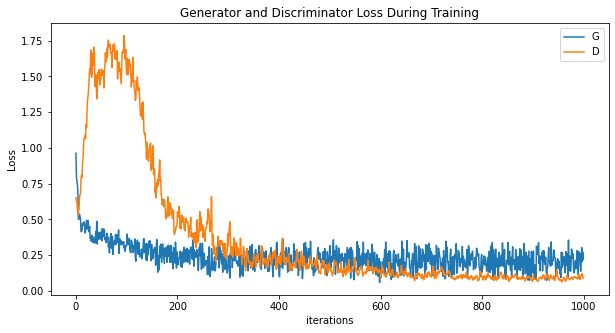

In [14]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses,label="G")
plt.plot(d_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
generator.save_weights('generator4.h5')
discriminator.save_weights('discriminator4.h5')

# Generating Images

In [13]:
generator.load_weights('generator4.h5')
discriminator.load_weights('discriminator4.h5')

In [16]:
save_imgs(100)